    Flow Duration   Total Fwd Packets   Total Backward Packets  Flow Bytes/s  \
0               3                   2                        0  4.000000e+06   
1             109                   1                        1  1.100917e+05   
2              52                   1                        1  2.307692e+05   
3              34                   1                        1  3.529412e+05   
4               3                   2                        0  4.000000e+06   

    Flow Packets/s   Average Packet Size   Label  
0     666666.66670                   9.0  BENIGN  
1      18348.62385                   9.0  BENIGN  
2      38461.53846                   9.0  BENIGN  
3      58823.52941                   9.0  BENIGN  
4     666666.66670                   9.0  BENIGN  
Label distribution:
 Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64

Encoded classes: ['BENIGN', 'DDoS']
Encoded label distribution: (array([0, 1]), array([ 97686, 128025], dtype=int64))
Accurac

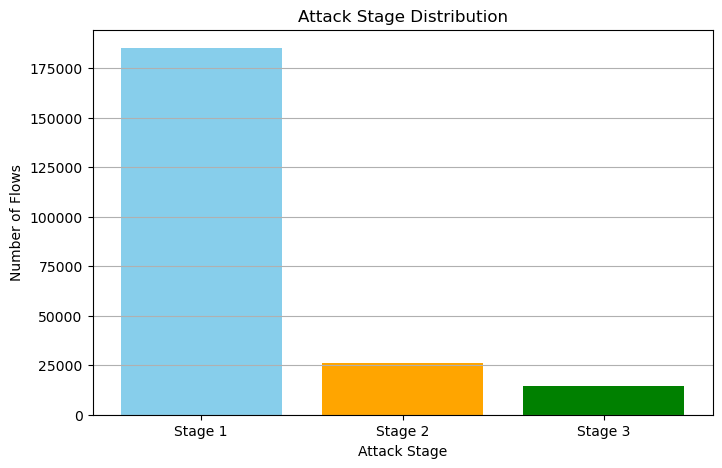

In [1]:
import pandas as pd

# Load file
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# Select features
features = [' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 
            'Flow Bytes/s', ' Flow Packets/s', ' Average Packet Size', ' Label']
df_small = df[features]

# Clean data
df_small = df_small.replace('Infinity', 0)
df_small = df_small.replace('NaN', 0)
for col in features[:-1]:
    df_small[col] = pd.to_numeric(df_small[col], errors='coerce').fillna(0)
    
import numpy as np
import matplotlib.pyplot as plt
print(df_small.head())
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Step 1: Replace inf/-inf strings with np.nan
df_small.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows where ANY feature or Label is NaN
df_small.dropna(inplace=True)
# Check class distribution
print("Label distribution:")
print(df_small[' Label'].value_counts())
# Step 3: Separate features (X) and labels (y)
X = df_small.drop(' Label', axis=1)
y = df_small[' Label']

# Step 4: Encode the labels (BENIGN, DDoS → numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Confirm label encoding mapping and distribution
le = LabelEncoder()
y = le.fit_transform(df_small[' Label'])
print("\nEncoded classes:", list(le.classes_))
print("Encoded label distribution:", np.unique(y, return_counts=True))


# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Step 6: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Create a function to assign stages
def assign_stage(row):
    try:
        if row['Flow Bytes/s'] < 1e5:
            return 'Stage 1'  # Early Attack
        elif 1e5 <= row['Flow Bytes/s'] < 1e6:
            return 'Stage 2'  # Ongoing Attack
        else:
            return 'Stage 3'  # Intense Attack
    except:
        return 'Stage 1'  # Default to Stage 1 if missing values
# Apply the function to your DataFrame
df_small['Attack Stage'] = df_small.apply(assign_stage, axis=1)
# Check feature correlation with label (encoded first)
df_small_temp = df_small.copy()
df_small_temp['Label Encoded'] = LabelEncoder().fit_transform(df_small_temp[' Label'])
correlation = df_small_temp.corr(numeric_only=True)
print("\nCorrelation with label:")
print(correlation['Label Encoded'].sort_values(ascending=False))

# Check the distribution of the stages
print(df_small['Attack Stage'].value_counts())
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define X and y
X = df_small.drop([' Label', 'Attack Stage'], axis=1)
y = df_small['Attack Stage']
# Check for duplicate rows
num_duplicates = df_small.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
acc_rf=accuracy_score(y_test,y_pred)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
import matplotlib.pyplot as plt

# Your stage counts
stage_counts = df_small['Attack Stage'].value_counts().to_dict()

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(stage_counts.keys(), stage_counts.values(), color=['skyblue', 'orange', 'green'])
plt.title('Attack Stage Distribution')
plt.xlabel('Attack Stage')
plt.ylabel('Number of Flows')
plt.grid(axis='y')
plt.savefig("graph.jpg")
plt.show()


    
